# Lab 8: Define and Solve an ML Problem of Your Choosing

In [18]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [19]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)
#df.head()

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I will be using the "airbnbListingsData.csv" dataset.
2. I will be predicting the price of Airbnb listings. The label is `price`.
3. This is a supervised regression learning problem since price is a continuous numerical value. 
4. My features are:
- `host_name`
- `host_response_rate`
- `host_acceptance_rate`
- `host_is_superhost`
- `host_listings_count`
- `host_total_listings_count`
- `host_has_profile_pic`
- `host_identity_verified`
- `accommodates`
- `bathrooms`
- `bedrooms`
- `beds`
- `minimum_nights`
- `maximum_nights`
- `minimum_minimum_nights`
- `maximum_minimum_nights`
- `minimum_maximum_nights`
- `maximum_maximum_nights`
- `minimum_nights_avg_ntm`
- `maximum_nights_avg_ntm`
- `has_availability`
- `availability_30`
- `availability_60`
- `availability_90`
- `availability_365`
- `number_of_reviews`
- `number_of_reviews_ltm`
- `number_of_reviews_l30d`
- `review_scores_rating`
- `review_scores_cleanliness`
- `review_scores_checkin`
- `review_scores_communication`
- `review_scores_location`
- `review_scores_value`
- `instant_bookable`
- `calculated_host_listings_count`
- `calculated_host_listings_count_entire_homes`
- `calculated_host_listings_count_private_rooms`
- `calculated_host_listings_count_shared_rooms`
- `reviews_per_month`
- `n_host_verifications`

5. Predicting price allows us to maximize Airbnb's revenue and ocupancy. Having a model that accurately predicts listing prices can provide potential consumers with rooms that align with their preferences and budgets. This can lead to higher customer satisfaction and increased bookings. Additionally, Airbnb can leverage this model to identify pricing trends, optimize their dynamic pricing algorithms, and help new hosts set optimal prices for their properties. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [20]:
#df.info()
#df.describe(include='all')

In [21]:
columns_to_remove = [
    'description', 'neighborhood_overview', 'host_location',
    'name', 'host_about', 'neighbourhood_group_cleansed', 'room_type', 'amenities'
]
df.drop(columns=columns_to_remove, inplace=True)

In [22]:
print(df.columns)

Index(['host_name', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_co

Handling Missing Values

In [23]:
mean_host_response_rate = df['host_response_rate'].mean()
df['host_response_rate'].fillna(mean_host_response_rate, inplace=True)

mean_host_acceptance_rate = df['host_acceptance_rate'].mean()
df['host_acceptance_rate'].fillna(mean_host_acceptance_rate, inplace=True)

mean_bedrooms = df['bedrooms'].mean()
df['bedrooms'].fillna(mean_bedrooms, inplace=True)

mean_beds = df['beds'].mean()
df['beds'].fillna(mean_beds, inplace=True)

In [24]:
#df.describe()
#print(df.dtypes)

Detetcing & Handling Outliers

In [25]:
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df_cleaned = df[~outliers]

#print("DataFrame after removing outliers:")
#print(df_cleaned)

In [26]:
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns
df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)

/tmp/ipykernel_1544/165393776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[bool_columns] = df_cleaned[bool_columns].astype(int)


In [27]:
correlation_matrix = df_cleaned.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df_cleaned.drop(columns=to_drop, inplace=True)

/tmp/ipykernel_1544/1614607728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=to_drop, inplace=True)


In [28]:
df_cleaned.columns

Index(['host_name', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications'],
      dtype='object')

In [29]:
selected_features = [
    'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 
    'review_scores_communication', 'review_scores_location', 
    'review_scores_value', 'reviews_per_month', 'n_host_verifications'
]
X = df_cleaned[selected_features]
y = df_cleaned['price']

In [30]:
df.head() 

,host_name,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Jennifer,0.800000,0.170000,True,8.0,8.0,True,True,1,1.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,LisaRoxanne,0.090000,0.690000,True,1.0,1.0,True,True,3,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,Rebecca,1.000000,0.250000,True,1.0,1.0,True,True,4,1.5,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Shunichi,1.000000,1.000000,True,1.0,1.0,True,True,2,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,MaryEllen,0.906901,0.791953,True,1.0,1.0,True,True,1,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

My selected features are:
- `host_response_rate`
- `host_acceptance_rate`
- `host_listings_count`
- `review_scores_communication`
- `review_scores_location`
- `review_scores_value`
- `reviews_per_month`
- `n_host_verifications`

The label is:
- 'price'

Train-Test Split
Splitting Data: Split the dataset into training and testing sets (typically 80% training, 20% testing) to evaluate model performance on unseen data.
Models

Linear Regression
Baseline Model: A simple model to understand the linear relationships between features and the target price.

Random Forest Regressor
Ensemble Model: A model that uses multiple decision trees to capture non-linear relationships and interactions between features such as host_acceptance_rate and review_scores_communication.

Gradient Boosting Regressor
Advanced Ensemble: An ensemble method that builds trees sequentially to correct the errors of previous trees, which can capture complex interactions between features.

Plan to Train, Analyze, and Improve the Model
Model Building
Initialize Models: Start with the selected models (Linear Regression, Random Forest, Gradient Boosting
Train Models: Fit the models on the training data using the selected features.
Cross-Validation: Use k-fold cross-validation to evaluate the model performance on the training data and to prevent overfitting.

Model Validation
Evaluation Metrics: Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) to evaluate the performance of the models on the test set.
Hyperparameter Tuning: Use Grid Search or Random Search to optimize hyperparameters for each model. This helps to improve model performance and ensure that models like Random Forest and Gradient Boosting are finely tuned.

Model Improvement
Error Analysis: Analyze the errors by looking at residual plots and error distributions to understand where the model is performing poorly. For example, check if certain ranges of reviews_per_month or host_listings_count are leading to higher errors.
Feature Importance: Use feature importance scores from models like Random Forest to identify which features contribute the most to predicting price. This helps to refine the feature set and possibly add or remove features.
Ensemble Methods: Combine the predictions of multiple models (stacking, bagging) to create a more robust model that leverages the strengths of different algorithms.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=123),
    "Gradient Boosting": GradientBoostingRegressor(random_state=123)
}


In [39]:
metrics = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    metrics[model_name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

In [40]:
for model, model_metrics in metrics.items():
    print(f"Model: {model}")
    for metric, value in model_metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Model: Linear Regression
MAE: 63.29987808093805
MSE: 7176.135011234892
R2: 0.05512867558868528


Model: Random Forest
MAE: 61.657254595372876
MSE: 6873.45033562195
R2: 0.09498272932062501


Model: Gradient Boosting
MAE: 59.57568582039772
MSE: 6438.256325279563
R2: 0.15228409562495293




Linear Regression Model 
MAE = 87.23 means the predicted price deviates from the actual price by about $87.23.
MSE = 18434.45 means the average squared difference between the predicted and actual prices is 18434.45. This shows us our model is NOT performing well and is failing to make accurate predictions. 
R2 = 0.024 means the model explains  only 2.4% of the variance in the price data. This shows us once again our model is not giving us any valauble insights. 

Random Forest
MAE = 79.81 means tthe predicted price deviates from the actual price by about $79.81.
MSE = 16127.63 means the average squared difference between the predicted and actual prices is 16127.63. This shows us our model is NOT performing well and is failing to make accurate predictions.
R2 = 0.146 means the model explains approximately 14.6% of the variance in the price data. This is better than the linear regression model, but still fails to account for most of the data. 

Gradient Boosting
MAE = 79.87 means the predicted price deviates from the actual price by about $79.87.
MSE = 16358.0 this means the average squared difference between the predicted and actual prices is 16358.0.
R2 = 0.134= This means the model explains approximately 13.4% of the variance in the price data. This is similar to the Random Forest model but slightly worse.



In [41]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)
best_rf = grid_search_rf.best_estimator_

In [42]:
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train, y_train)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_lr_pred = model.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)

lr_r2 = r2_score(y_test, y_lr_pred)


print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))


[LR] Root Mean Squared Error: 84.71207122503198
[LR] R2: 0.055128675588685394


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[DT] RMSE for the best model is : 86.54
[DT] Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4}
[DT] Root Mean Squared Error: 83.69125162838156
[DT] R2: 0.07776373940014725


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[Stacking] Root Mean Squared Error: 81.81110478202301
[Stacking] R2: 0.11873487676710304


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[GBDT] Root Mean Squared Error: 80.32358284935287
[GBDT] R2: 0.15049055443895276
[RF] Root Mean Squared Error: 82.6886950439823
[RF] R2: 0.09972675360241201


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


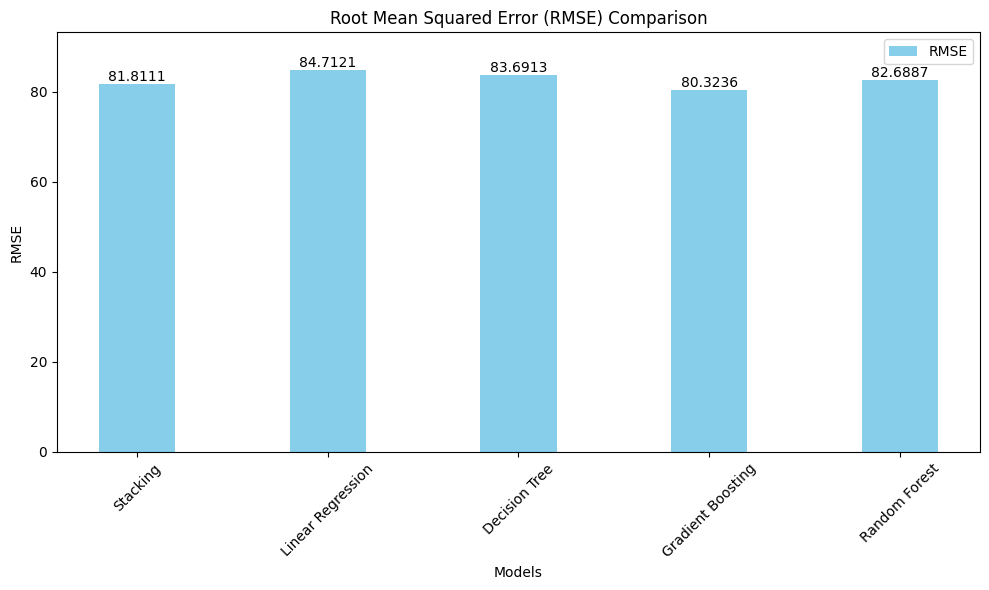

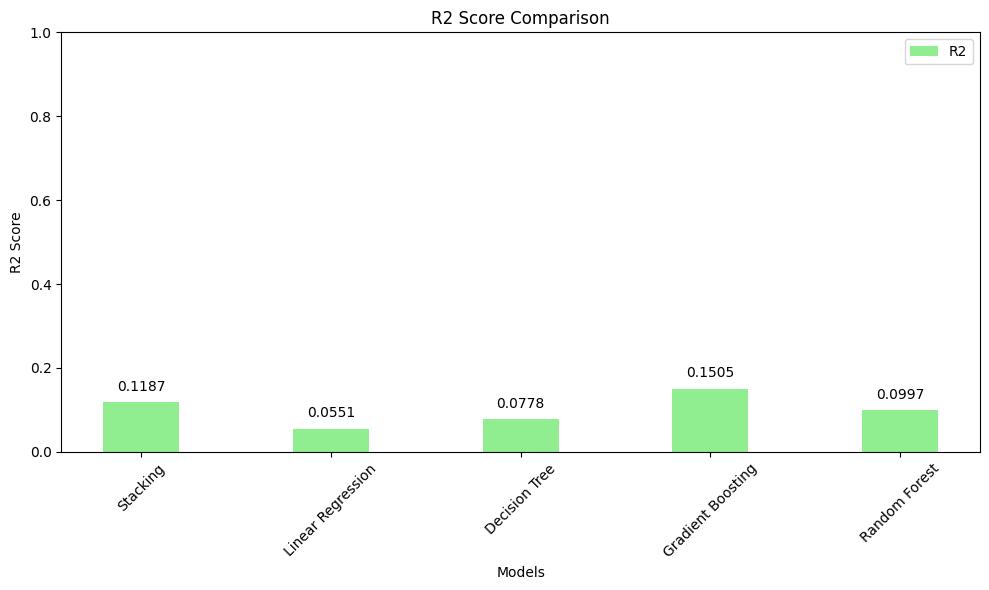

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

dt_regressor = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)
rmse_DT = -1 * dt_grid_search.best_score_
dt_best_params = dt_grid_search.best_params_

print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT))
print("[DT] Best Parameters: ", dt_best_params)

best_max_depth = dt_best_params['max_depth']
best_min_samples_leaf = dt_best_params['min_samples_leaf']
dt_model = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))


estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)), ("LR", LinearRegression())]
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
stack_rmse = mean_squared_error(y_test, stacking_pred, squared=False)
stack_r2 = r2_score(y_test, stacking_pred)

print('[Stacking] Root Mean Squared Error: {0}'.format(stack_rmse))
print('[Stacking] R2: {0}'.format(stack_r2))


gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
gbdt_model.fit(X_train, y_train)
y_gbdt_pred = gbdt_model.predict(X_test)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))


rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
models = ['Stacking', 'Linear Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']


plt.figure(figsize=(10, 6))
plt.bar(models, RMSE_Results, width=0.4, color='skyblue', label='RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xticks(rotation=45)
plt.ylim([0, max(RMSE_Results) * 1.1])
plt.legend()
for i, v in enumerate(RMSE_Results):
    plt.text(i, v + 0.005, '{:.4f}'.format(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(models, R2_Results, width=0.4, color='lightgreen', label='R2')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.legend()
for i, v in enumerate(R2_Results):
    plt.text(i, v + 0.02, '{:.4f}'.format(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()